## Development of the parts tree search

In [1]:
# take NOUN and search for it in the parts tree DESCRIPTION, return the best match (max characters matching)

# for the best match DESCRIPTION, search up the parts tree, checking each higher level for a match to Objects

import pandas as pd
import numpy as np

pt_df = pd.read_csv('UH60_parts_tree.csv')

In [2]:
#remove the leading single quote from the RFG codes
pt_df['RFG'] = pt_df['RFG'].str.replace("'", "")

In [3]:
pt_df.head(25)

,RFG,DESCRIPTION
0,00,Utility Helicopter
1,01,Admin
2,02,Airframe
3,02_10HR-14DAY,10 Hour/14 Day Run-up
4,02_120HR,120 Hour Inspection
5,02_327FRAME,Inspect Frame Station 327 for Cracks
6,02_360HR,PMI 1
7,02_40HR,40 Hour Inspection
8,02_6MONTH,6 MONTH INSPECTION
9,02_90DAY_CCI,90 Day Corrosion Inspection


In [6]:
# remove the non-parts related rows
# Drop rows 1 and 3:14 in place
pt_df.drop(pt_df.index[[1, 3,4,5,6,7,8,9,10,11,12,13,14], ], axis=0, inplace=True)
pt_df.reset_index(drop=True, inplace=True)

In [7]:
pt_df.head(10)

,RFG,DESCRIPTION
0,00,Utility Helicopter
1,02,Airframe
2,02_WASH,Aircraft Wash
3,02_WB,Aircraft Weight and Balance
4,02A,Forward Fuselage Section
5,02A01,Window/Windshield Installation
6,02A01A,Pilots Windshield
7,02A01B,Co-Pilots Windshield
8,02A01C,Upper Overhead Window
9,02A01D,Lower Nose Window


In [8]:
# split the text and numbers
# max RFG coding is 6 levels deep (dwdwdw)
# Using re.findall() 
import re
# Splitting text and number in string 
test_str = '02A01C02B'
res_d = [re.findall(r'([0-9]+)', test_str) ] #finds all digit groups, returns a list
res_w = [re.findall(r'([a-zA-Z]+)', test_str) ] #finds all word groups, returns a list

print(res_d, res_w)

[['02', '01', '02']] [['A', 'C', 'B']]


In [9]:
import re
# need a six layer index for each part
mi_list = []
for code in pt_df['RFG'].values:
    res_d = re.findall(r'([0-9]+)', str(code)) #finds all digit groups, returns a list
    res_w = re.findall(r'([a-zA-Z]+)', str(code)) #finds all word groups, returns a list
    tree_depth = len(res_d) + len(res_w) # gets the depth of the tree for this part
    if tree_depth == 6:
        mi_list.append([res_d[0],res_w[0],res_d[1],res_w[1],res_d[2],res_w[2]])
    elif tree_depth == 5:
        mi_list.append([res_d[0],res_w[0],res_d[1],res_w[1],res_d[2], float("NaN")])
    elif tree_depth == 4:
        mi_list.append([res_d[0],res_w[0],res_d[1],res_w[1],float("NaN"),float("NaN")])      
    elif tree_depth == 3:
        mi_list.append([res_d[0],res_w[0],res_d[1],float("NaN"),float("NaN"),float("NaN")]) 
    elif tree_depth == 2:
        mi_list.append([res_d[0],res_w[0],float("NaN"),float("NaN"),float("NaN"),float("NaN")]) 
    elif tree_depth == 1:
        mi_list.append([res_d[0],float("NaN"),float("NaN"),float("NaN"),float("NaN"),float("NaN")]) 

In [10]:
mi_list[:10]

[['00', nan, nan, nan, nan, nan],
 ['02', nan, nan, nan, nan, nan],
 ['02', 'WASH', nan, nan, nan, nan],
 ['02', 'WB', nan, nan, nan, nan],
 ['02', 'A', nan, nan, nan, nan],
 ['02', 'A', '01', nan, nan, nan],
 ['02', 'A', '01', 'A', nan, nan],
 ['02', 'A', '01', 'B', nan, nan],
 ['02', 'A', '01', 'C', nan, nan],
 ['02', 'A', '01', 'D', nan, nan]]

In [11]:
index_df = pd.DataFrame(mi_list, columns =['L1', 'L2', 'L3', 'L4', 'L5', 'L6'], dtype = str)

In [10]:
#index = pd.MultiIndex.from_tuples(mi_list, names=['L1', 'L2', 'L3', 'L4', 'L5', 'L6'])

In [12]:
index_df

,L1,L2,L3,L4,L5,L6
0,00,NaN,NaN,NaN,NaN,NaN
1,02,NaN,NaN,NaN,NaN,NaN
2,02,WASH,NaN,NaN,NaN,NaN
3,02,WB,NaN,NaN,NaN,NaN
4,02,A,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1142,76,J,07,NaN,NaN,NaN
1143,80,NaN,NaN,NaN,NaN,NaN
1144,82,NaN,NaN,NaN,NaN,NaN
1145,83,NaN,NaN,NaN,NaN,NaN


In [13]:
df = pd.concat([index_df, pt_df], axis=1)

In [14]:
df['DESCRIPTION'] = df['DESCRIPTION'].str.lower()
df

,L1,L2,L3,L4,L5,L6,RFG,DESCRIPTION
0,00,NaN,NaN,NaN,NaN,NaN,00,utility helicopter
1,02,NaN,NaN,NaN,NaN,NaN,02,airframe
2,02,WASH,NaN,NaN,NaN,NaN,02_WASH,aircraft wash
3,02,WB,NaN,NaN,NaN,NaN,02_WB,aircraft weight and balance
4,02,A,NaN,NaN,NaN,NaN,02A,forward fuselage section
...,...,...,...,...,...,...,...,...
1142,76,J,07,NaN,NaN,NaN,76J07,"cabn dispense &amp;amp; safey switch, improved..."
1143,80,NaN,NaN,NaN,NaN,NaN,80,special tools
1144,82,NaN,NaN,NaN,NaN,NaN,82,flyaway items
1145,83,NaN,NaN,NaN,NaN,NaN,83,ground support item


In [15]:
#df.to_csv(r'/Users/mh302/OneDrive - West Point/Backup/ORCEN/CPO/record_linkage/parts_tree_df.csv', encoding='utf-8', index=False)

In [ ]:
# use multi-indexing in pandas to represent the parts tree
# separate the WUCs into separate elements, by num and letter splitting
# build a dictionary of the WUCs to part DESCRIPTION
    # use the separated WUCs as tuples to generate keys
    # the values are the DESCRIPTION
# make a multi-index pandas df from the dictionary: pd.Series(dict)

In [16]:
# with the best match DESCRIPTION, subset the multi-index df to the highest index for that DESCRIPTION
# search for the best jaro-winkler score for both the tier 1 and tier 2 objects, store these scores
    # https://pypi.org/project/textdistance/
# show distribution of the scores
# evaluate the winkler scores...ie above 0.3 is no match
import textdistance as td
td.jaro('test', 'text')
td.jaro_winkler('test', 'text')

0.8666666666666667

In [17]:
# bring in cc data
df_cc = pd.read_csv(r'UH60 Corrosion JAN 2000 to MAR 2019 (unfiltered)-Johns MacBook Pro.csv', encoding ='latin1', low_memory=False)

In [18]:
cc_parts = list(set(df_cc['NOUN']))
cc_parts_lower = []
for part in cc_parts:
    cc_parts_lower.append(part.lower())

In [19]:
tree_parts = []
for tree_part in df['DESCRIPTION'].values:
    tree_parts.append(tree_part.lower())

In [20]:
# Jaro-Winkler
max_sim_scores = []
for cc_part in cc_parts_lower:
    similarity_max = 0
    tree_match = ""
    for tree_part in tree_parts:
        if td.jaro_winkler(cc_part, tree_part) > similarity_max:
            similarity_max = td.jaro_winkler(cc_part, tree_part)
            tree_match = tree_part
    max_sim_scores.append([tree_match, similarity_max])

for i in range(0, len(max_sim_scores)):
    print(max_sim_scores[i], '|' , cc_parts_lower[i])

['air data computer', 1] | air data computer
['fire extinguisher', 0.7024509803921569] | inflight refueling probe
['intermediate gearbox cover', 0.9538461538461538] | intermediate gearbox
['power take-off drive, cold section module', 0.8926829268292683] | power takeoff drive
['tail rotor boots and clamps', 0.8676328502415458] | tail rotor gearbox assy
['accumulator, rotor brake', 0.8480303030303031] | accumulater, pneumatic
['no. 3 ball bearing, cold section module', 0.8270487682252388] | no 6 ball bearing
['generator current limiter', 0.872] | generator
['glareshield', 0.7306818181818182] | gearshaft, bevel
['stabilator amplifier, m/r primary controls', 0.87989417989418] | stabilator amplifier (dual)
['stage 1 turbine disk, hot section module', 0.8242307692307693] | stage 5 blisk
['tail pylon fitting', 1] | tail pylon fitting
['data concentrator unit', 0.9913043478260869] | data  concentrator unit
['fuel control hmu', 0.9777777777777777] | fuel control (hmu)
['dc primary buss contacto

## J-W doesn't work well sometimes due to edit distance technique of prefix boosting
### need to consider some token based methods and munging techniques


In [ ]:
%%script false --no-raise-error
# editext (NOT AS GOOD AS J-W)
# phonetic based
max_sim_scores_e = []
for cc_part in cc_parts_lower:
    similarity_max = 0
    tree_match = ""
    for tree_part in tree_parts:
        if td.ratcliff_obershelp(cc_part, tree_part) > similarity_max:
            similarity_max = td.ratcliff_obershelp(cc_part, tree_part)
            tree_match = tree_part
    max_sim_scores_e.append([tree_match, similarity_max])
    
for i in range(0, len(max_sim_scores_e)):
    print(max_sim_scores_e[i], '|' , cc_parts_lower[i])

In [ ]:
%%script false --no-raise-error
# ratcliff_obershelp (NOT AS GOOD AS J-W)
# sequence based
max_sim_scores_ro = []
for cc_part in cc_parts_lower:
    similarity_max = 0
    tree_match = ""
    for tree_part in tree_parts:
        if td.ratcliff_obershelp(cc_part, tree_part) > similarity_max:
            similarity_max = td.ratcliff_obershelp(cc_part, tree_part)
            tree_match = tree_part
    max_sim_scores_ro.append([tree_match, similarity_max])
    
for i in range(0, len(max_sim_scores_ro)):
    print(max_sim_scores_ro[i], '|' , cc_parts_lower[i])

In [ ]:
%%script false --no-raise-error
# monge_elkan (Takes forever and NOT AS GOOD AS J-W or any others
# token based
max_sim_scores_me = []
for cc_part in cc_parts_lower:
    similarity_max = 0
    tree_match = ""
    for tree_part in tree_parts:
        if td.monge_elkan(cc_part, tree_part) > similarity_max:
            similarity_max = td.monge_elkan(cc_part, tree_part)
            tree_match = tree_part
    max_sim_scores_me.append([tree_match, similarity_max])
    
for i in range(0, len(max_sim_scores_me)):
    print(max_sim_scores_me[i], '|' , cc_parts_lower[i])

In [ ]:
%%script false --no-raise-error
# jaccard (NOT AS GOOD AS J-W or ratcliff)
# token based
max_sim_scores_j = []
for cc_part in cc_parts_lower:
    similarity_max = 0
    tree_match = ""
    for tree_part in tree_parts:
        if td.jaccard(cc_part, tree_part) > similarity_max:
            similarity_max = td.jaccard(cc_part, tree_part)
            tree_match = tree_part
    max_sim_scores_j.append([tree_match, similarity_max])
    
for i in range(0, len(max_sim_scores_j)):
    print(max_sim_scores_j[i], '|' , cc_parts_lower[i])

In [3]:
from fuzzywuzzy import fuzz
print(fuzz.token_sort_ratio('planetary carrier, main xmsn', 'transmission'))
print(fuzz.token_sort_ratio('main transmission (xmsn)', 'transmission'))
print(fuzz.token_sort_ratio('drive system', 'transmission'))

31
71
33


In [21]:
from fuzzywuzzy import fuzz
# levenshtein distance doesn't use prefix boosting in the match score.
# fuzzywuzzy is probably the best alternative to j-w (token_sort_ratio reorders words and uses levenshtein distance)
max_sim_scores_fz = []
for cc_part in cc_parts_lower:
    similarity_max = 0
    tree_match = ""
    for tree_part in tree_parts:
        if fuzz.token_sort_ratio(cc_part, tree_part) > similarity_max:
            similarity_max = fuzz.token_sort_ratio(cc_part, tree_part)
            tree_match = tree_part
    max_sim_scores_fz.append([tree_match, similarity_max])
    
for i in range(0, len(max_sim_scores_fz)):
    print(max_sim_scores_fz[i], '|' , cc_parts_lower[i])
    max_sim_scores_fz[i].append(cc_parts_lower[i].upper())

['air data computer', 100] | air data computer
['closed circuit refueling rec', 62] | inflight refueling probe
['intermediate gearbox (igb)', 91] | intermediate gearbox
['power take-off drive, cold section module', 54] | power takeoff drive
['de-ice tail rotor', 65] | tail rotor gearbox assy
['ambulatory seat', 61] | accumulater, pneumatic
['axial fan bearing', 71] | no 6 ball bearing
['ac generator', 86] | generator
['extension shaft, m/r head', 56] | gearshaft, bevel
['dual stabilator controler(dsc)', 70] | stabilator amplifier (dual)
['stage 5 disk, cold section module', 53] | stage 5 blisk
['tail pylon fitting', 100] | tail pylon fitting
['data concentrator unit', 100] | data  concentrator unit
['fuel control hmu', 100] | fuel control (hmu)
['main rotor indexer', 59] | nut assy, main rotor
['ce seat inertia reel assy', 53] | t700-ge-701c engine assy
['anti-ice start bleed valve', 70] | anti-ice valve
['engine high speed shaft indexer', 57] | t/r pitch change shaft
['ce seat inertia

In [22]:
tree_2410_match_df = pd.DataFrame(max_sim_scores_fz, columns = ['DESCRIPTION', 'sim_score', 'NOUN']) 
cc_treez_match_df = pd.merge(df, tree_2410_match_df, on='DESCRIPTION', how='left')
#cc_treez_match_df.to_csv(r'/Users/mh302/Desktop/cc_treez_match_df.csv', encoding='utf-8', index=False)
cc_treez_match_df

,L1,L2,L3,L4,L5,L6,RFG,DESCRIPTION,sim_score,NOUN
0,00,NaN,NaN,NaN,NaN,NaN,00,utility helicopter,NaN,NaN
1,02,NaN,NaN,NaN,NaN,NaN,02,airframe,NaN,NaN
2,02,WASH,NaN,NaN,NaN,NaN,02_WASH,aircraft wash,63.0,"WINCH,AIRCRAFT MOUNTED"
3,02,WB,NaN,NaN,NaN,NaN,02_WB,aircraft weight and balance,62.0,"WINCH, AIRCRAFT MOUNTED, EXTERNAL"
4,02,A,NaN,NaN,NaN,NaN,02A,forward fuselage section,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1182,76,J,07,NaN,NaN,NaN,76J07,"cabn dispense &amp;amp; safey switch, improved...",NaN,NaN
1183,80,NaN,NaN,NaN,NaN,NaN,80,special tools,NaN,NaN
1184,82,NaN,NaN,NaN,NaN,NaN,82,flyaway items,NaN,NaN
1185,83,NaN,NaN,NaN,NaN,NaN,83,ground support item,NaN,NaN


In [23]:
# Potential for non-matches to have higher similarity scores...thus we select non-matches over matches in the above LED max sim score loop
print('winch, aircraft mounted' + '|' + 'winch, external' + '|', fuzz.token_sort_ratio('winch, aircraft mounted', 'winch, external'))
print('winch, aircraft mounted' + '|' + 'skid, aircraft mounted' + '|', fuzz.token_sort_ratio('winch, aircraft mounted', 'skid, aircraft mounted'))

winch, aircraft mounted|winch, external| 44
winch, aircraft mounted|skid, aircraft mounted| 84


In [24]:
cc_fuzzy_match_true_labs =  pd.read_csv('cc_treez_match_df_human_ann.csv')

In [25]:
tot = len(cc_fuzzy_match_true_labs['match'])
len(cc_fuzzy_match_true_labs[cc_fuzzy_match_true_labs['match'] == 0].match) / (tot - cc_fuzzy_match_true_labs['match'].isnull().sum())

0.4311377245508982

In [26]:
max(cc_fuzzy_match_true_labs[cc_fuzzy_match_true_labs['match'] == 0].sim_score)

74.0

In [27]:
num_matches43to74 = len(cc_fuzzy_match_true_labs[(cc_fuzzy_match_true_labs['match'] == 1) & (cc_fuzzy_match_true_labs['sim_score'] <= 74) & (cc_fuzzy_match_true_labs['sim_score'] >= 43)].sim_score)
total_43to74 = len(cc_fuzzy_match_true_labs[(cc_fuzzy_match_true_labs['sim_score'] <= 74) & (cc_fuzzy_match_true_labs['sim_score'] >= 43)].sim_score)
num_matches43to74 / total_43to74


0.42857142857142855

In [28]:
from statsmodels.stats import proportion as prop
# compute 95% CI on proportion of matches present between sim scores of 43 anad 74
match_prop = prop.proportion_confint(count=num_matches43to74, nobs=total_43to74, alpha=0.05, method='normal')
match_prop

(0.34216314039440565, 0.5149797167484514)

In [29]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.figsize"] = 6,4

bins = np.linspace(46, 100, 27)

cc_fuzzy_match_true_labs.sim_score.plot.hist(grid=True, bins=bins, rwidth=0.9,
                   color='green')
cc_fuzzy_match_true_labs[cc_fuzzy_match_true_labs['match'] == 0].sim_score.plot.hist(grid=True, bins=bins, rwidth=0.9,
                   color='red')
plt.title('Histogram of CCAD DA2410 Match Scores')
plt.xlabel('Levenshtein Similarity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.savefig('fuzzy_sort_cc_tree_hist.png', dpi=600, bbox_inches='tight')

plt.show()

<Figure size 600x400 with 1 Axes>

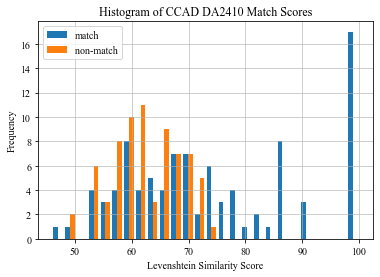

In [61]:
match = cc_fuzzy_match_true_labs[cc_fuzzy_match_true_labs['match'] == 1].sim_score
non_match = cc_fuzzy_match_true_labs[cc_fuzzy_match_true_labs['match'] == 0].sim_score

bins = np.linspace(46, 100, 27)

plt.hist([match, non_match], bins, label=['match', 'non-match'])
plt.legend(loc='upper left')
plt.title('Histogram of CCAD DA2410 Match Scores')
plt.xlabel('Levenshtein Similarity Score')
plt.ylabel('Frequency')
plt.grid(axis='both', alpha=0.75)

plt.savefig('fuzzy_sort_cc_tree_hist2.png', dpi=600, bbox_inches='tight')

plt.show()

In [30]:
%%script false --no-raise-error
# fuzzywuzzy is probably the best alternative to j-w (token_set_ratio uses any set match and levenshtein distance)
max_sim_scores_fz = []
for cc_part in cc_parts_lower:
    similarity_max = 0
    tree_match = ""
    for tree_part in tree_parts:
        if fuzz.token_set_ratio(cc_part, tree_part) > similarity_max:
            similarity_max = fuzz.token_set_ratio(cc_part, tree_part)
            tree_match = tree_part
    max_sim_scores_fz.append([tree_match, similarity_max])
    
for i in range(0, len(max_sim_scores_fz)):
    print(max_sim_scores_fz[i], '|' , cc_parts_lower[i])

In [31]:
# bring in the joined df from the Dask_MADW_UH60_2017 notebook
cc_madw_df = pd.read_csv(r'/Users/mh302/Desktop/2017_joined_cc_madw.csv', encoding='utf-8', low_memory=False)
cc_madw_df.head()

,index,COPY,DATE_2410,PN_NOUN,NSN,PN,SN,DESCRIPTION,REMARKS,SYS_CAT,...,TMS,TotalCalcCorroCost,TotalCalcCost,UnitCD,Tier1Object,Tier2Object,maint_start_date,maint_end_date,tier1_obj,tier2_obj
0,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,UH-60L,0.0,21.4859,W0Y407,ENGINE OR PROPULSION,DOOR,2017-10-20 00:00:00.000000,2017-11-21 00:00:00.000000,ENGINE OR PROPULSION,DOOR
1,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,UH-60L,0.0,11.5412,W0Y407,ENGINE OR PROPULSION,DEFLECTOR,2017-10-18 00:00:00.000000,2017-11-20 00:00:00.000000,ENGINE OR PROPULSION,DEFLECTOR
2,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,UH-60L,0.0,11.5412,W0Y407,NAVIGATIONAL CONTROL INSTRUMENTATION,DATA SIGNAL CONVERTER,2017-10-05 00:00:00.000000,2017-10-30 00:00:00.000000,NAVIGATIONAL CONTROL INSTRUMENTATION,DATA SIGNAL CONVERTER
3,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,UH-60L,0.0,36.4031,W0Y407,(null),MOUNT,2017-10-26 00:00:00.000000,2017-11-28 00:00:00.000000,(null),MOUNT
4,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,UH-60A,0.0,39.2653,W0Y407,(null),UNKNOWN,2017-10-20 00:00:00.000000,2017-11-13 00:00:00.000000,(null),UNKNOWN


In [32]:
cc_madw_df.columns

Index(['index', 'COPY', 'DATE_2410', 'PN_NOUN', 'NSN', 'PN', 'SN',
       'DESCRIPTION', 'REMARKS', 'SYS_CAT', 'NHA_SN', 'UIC', 'CITY',
       'ORG_NAME', 'QTY', 'YEAR', 'NOUN', 'PRICE', 'date1_2410', 'AvailCD',
       'CalcLaborCorroCost', 'CalcLaborCost', 'CalcMatlCorroCost',
       'CalcMatlCost', 'CorrectiveCorroCost', 'CorrectiveMaintCost',
       'CorroPerc', 'DataSource', 'EndItemUniqueID', 'EngineTMS',
       'InstallationMasterName', 'ESIZone', 'LMIWBS', 'LMIWBSNIIN',
       'MaintActionCD', 'MaintActionFY', 'MaintCompletionDate', 'MaintDLH',
       'MaintOperationDetailDesc', 'MaintStartDate', 'Maint_TAT',
       'OPNComplDate', 'OPNStartDate', 'OrigLaborCost', 'orig_maint_tat',
       'OrigMatlCost', 'PartCorroCost', 'PartMaintCost',
       'PreventiveCorrective', 'PreventiveCorroCost', 'PreventiveMaintCost',
       'SorCD', 'StructureCorroCost', 'StructureMaintCost', 'TMS',
       'TotalCalcCorroCost', 'TotalCalcCost', 'UnitCD', 'Tier1Object',
       'Tier2Object', 'maint_s

In [33]:
# exploring Tier Objects for Tech Report
print(len(set(cc_madw_df['Tier1Object'])))
print(len(set(cc_madw_df['Tier2Object'])))

print(set(cc_madw_df['Tier1Object']))

iter = 0
for obj in set(cc_madw_df['Tier2Object']):
    print("'"+obj+"'")
    iter += 1
    if iter > 20:
        break

44
864
{'(null)', 'GEARBOX', 'GENERATOR', 'DATA PROCESSING EQUIPMENT', 'DRIVE SYSTEM', 'ALARM OR WARNING SYSTEM', 'AIR CONDITIONING HEATING OR PRESSURIZING EQUIPMENT', 'ARMAMENT MISSILE', 'HYDRAULIC OR PNEUDRALIC', 'AUTOMATIC DIRECTIONAL CONTROL', 'PHOTOGRAPHIC OR VIDEO EQUIPMENT', 'CRYPTOGRAPHIC/SECURITY EQUIPMENT', 'COUNTERMEASURE EQUIPMENT', 'FIRE FIGHTING EQUIPMENT', 'NAVIGATIONAL CONTROL INSTRUMENTATION', 'ELECTRICAL SYSTEM', 'INSULATION OR LAGGING', 'GROUND SUPPORT EQUIPMENT', 'ARMAMENT NON MISSILE', 'NON-DIRECTIONAL CONTROL INSTRUMENTATION', 'BODY FRAME OR HULL DOOR', 'CARGO HANDLING EQUIPMENT', 'MAINTENANCE OR REPAIR SHOP EQUIPMENT', 'TARGET ACQUISITION SYSTEM', 'BODY FRAME OR HULL NOT DOOR', 'NAVIGATIONAL CONTROL HARDWARE', 'HELICOPTER ROTOR BLADE', 'INDUSTRIAL EQUIPMENT', 'MISCELLANEOUS AIRCRAFT', 'OTHER AVIONIC OR ELECTRONIC', 'REFUELING EQUIPMENT', 'ENVIRONMENTAL CONTROL SYSTEM', 'FIRE CONTROL EQUIPMENT', 'POWER DISTRIBUTION EQUIPMENT', 'FUEL SYSTEM', 'SAFETY RESCUE OR SURV

In [34]:
cc_madw_df = pd.merge(cc_madw_df, cc_treez_match_df, on='NOUN', how='left')
cc_madw_df.head()

,index,COPY,DATE_2410,PN_NOUN,NSN,PN,SN,DESCRIPTION_x,REMARKS,SYS_CAT,...,tier2_obj,L1,L2,L3,L4,L5,L6,RFG,DESCRIPTION_y,sim_score
0,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,DOOR,15,C,05,NaN,NaN,NaN,15C05,apu start fuel nozzle,60.0
1,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,DEFLECTOR,15,C,05,NaN,NaN,NaN,15C05,apu start fuel nozzle,60.0
2,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,DATA SIGNAL CONVERTER,15,C,05,NaN,NaN,NaN,15C05,apu start fuel nozzle,60.0
3,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,MOUNT,15,C,05,NaN,NaN,NaN,15C05,apu start fuel nozzle,60.0
4,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,UNKNOWN,15,C,05,NaN,NaN,NaN,15C05,apu start fuel nozzle,60.0


In [ ]:
#LEGACY for comparison to record linkage techniques
%%script false --no-raise-error
import re

# already did the date and UIC joining
# this finds any word in NOUN within any tier1 or tier2 object for each row.
tier_1_match = []
tier_2_match = []
i=-1
for record in cc_madw_df['NOUN'].values:
    i += 1
    #print(record.split())
    if i % 100000 == 0:
        print(i)
    
    try:
        # check for NOUN in Tier1Object
        if re.compile('|'.join(record.split()),re.IGNORECASE).search(cc_madw_df['tier1_obj'].values[i]):
            tier_1_match.append(1)
        else:
            tier_1_match.append(0)
    except:
        tier_1_match.append(0)
        print("An exception (Tier1) occurred at index: ", i, cc_madw_df['NOUN'].values[i])
        
    try:       
        # check for NOUN in Tier2Object
        if re.compile('|'.join(record.split()),re.IGNORECASE).search(cc_madw_df['tier2_obj'].values[i]):
            tier_2_match.append(1)
        else:
            tier_2_match.append(0)
    except:
        tier_2_match.append(0)
        print("An exception (Tier2) occurred at index: ", i, cc_madw_df['NOUN'].values[i])

## Method to match MADW tier objects
- Establish an easily searched hierarchical df for the UH60 parts tree (df)
- Find the best match for each DA2410 part in the UH60 parts tree, join the 2410 part and its similarity score in columns to df
- Join the parts tree df with the madw_cc master df
- Now can check by row

For each block of 2410 records
    calc the fuzzy match score and JW score for each tier object compared to the parts tree parts (ie all in same row)
    calc the fuzzy match score and JW score for each tier object, for each object up the parts tree hierarchy
    return the best row for the 2410 block, the best matches of tier obj to parts tree obj, and their scores
    
Now I can look at similarity scores for each tier obj to the parts tree part for each 2410 record
Set a threshold for what is a part match and adjudicate which 2410 records are not reflected inthe MADW
Then check for corrosion matches on those parts that have a match in the MADW

    

In [ ]:
for i in range(0,len(cc_madw_df['NOUN'].values)):
    # calc sorted levenshtein distance of tier objs to best 2410 parts tree match
    
    # look upwards in the parts tree hierarchy, calc the similarity scores, return the best matches for tier objs
    
    # 

In [35]:
# can we do this part with column-wise operations? YES
# calc sorted levenshtein distance of tier objs to best 2410 parts tree match
cc_madw_df['t1_prt_tree_lev'] = fuzz.token_sort_ratio(cc_madw_df['tier1_obj'].str.lower(), cc_madw_df['DESCRIPTION_y'])
cc_madw_df['t2_prt_tree_lev'] = fuzz.token_sort_ratio(cc_madw_df['tier2_obj'].str.lower(), cc_madw_df['DESCRIPTION_y'])

In [36]:
cc_madw_df['t1_prt_tree_lev'].head()

0    54
1    54
2    54
3    54
4    54
Name: t1_prt_tree_lev, dtype: int64

In [37]:
high_level_cd = cc_madw_df.loc[1, 'L1']
df[df['L1']==high_level_cd].loc[: , ['RFG', 'DESCRIPTION']]

,RFG,DESCRIPTION
697,15,auxiliary power plant (apu) system
698,15A,apu installation
699,15A01,"inboard/outboard mount, apu"
700,15A02,apu exhaust duct
701,15A03,apu combustor drain valve
702,15A04,apu control unit
703,15A05,apu control switch
704,15A06,apu inlet barrier filter
705,15B,apu engine
706,15B01,apu combustor section


In [38]:
# Need to look 'up' the parts tree and then keep the best match for that major component of the UH60 parts tree
# Tier 2 obj may be a higher level in the tree than the 2410 part since the maintenance action may have been much broader than the 2410 part that was removed from the UH60
# Tier 1 object SHOULD be at a higher level in the tree than the 2410 part and Tier 2 part
tier_tree_match = []
# 
for row_i in range(len(cc_madw_df['NOUN'].values)):
    
    tier1 = cc_madw_df.loc[row_i, 'tier1_obj']
    tier2 = cc_madw_df.loc[row_i, 'tier2_obj']
    
    # use the highest level tree hierarchy code and search accross all those subparts
    high_level_cd = cc_madw_df.loc[row_i, 'L1']
    tmp = df[df['L1']==high_level_cd].loc[:, ['RFG', 'DESCRIPTION']]
    
    similarity_max1 = cc_madw_df.loc[row_i, 't1_prt_tree_lev']
    similarity_max2 = cc_madw_df.loc[row_i, 't2_prt_tree_lev']
    tree_match1 = "No Improvement"
    tree_match2 = "No Improvement"
    for tree_part in tmp['DESCRIPTION'].values:
        if fuzz.token_sort_ratio(tier1, tree_part) > similarity_max1:
            similarity_max1 = fuzz.token_sort_ratio(tier1, tree_part)
            tree_match1 = tree_part
        if fuzz.token_sort_ratio(tier2, tree_part) > similarity_max2:
            similarity_max2 = fuzz.token_sort_ratio(tier2, tree_part)
            tree_match2 = tree_part
            
    tier_tree_match.append([tree_match1, similarity_max1, tree_match2, similarity_max2])
    
    if row_i % 100000 == 0:
        print(row_i)
    


0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


In [39]:
ttm_df = pd.DataFrame(tier_tree_match, columns = ['tree_match1', 'similarity_max1', 'tree_match2', 'similarity_max2'])
cc_madw_df = pd.concat([cc_madw_df, ttm_df], axis=1)
#ttm_df
#set(ttm_df['tree_match1'])
#set(ttm_df['tree_match2'])


In [101]:
#cc_madw_df.to_csv(r'/Users/mh302/Desktop/2017_cc_madw_df_fuzzy.csv', encoding='utf-8', index=False)
#cc_madw_df = pd.read_csv(r'/Users/mh302/Desktop/2017_cc_madw_df_fuzzy.csv', encoding='utf-8', low_memory=False)

In [40]:
cc_madw_df.columns

Index(['index', 'COPY', 'DATE_2410', 'PN_NOUN', 'NSN', 'PN', 'SN',
       'DESCRIPTION_x', 'REMARKS', 'SYS_CAT', 'NHA_SN', 'UIC', 'CITY',
       'ORG_NAME', 'QTY', 'YEAR', 'NOUN', 'PRICE', 'date1_2410', 'AvailCD',
       'CalcLaborCorroCost', 'CalcLaborCost', 'CalcMatlCorroCost',
       'CalcMatlCost', 'CorrectiveCorroCost', 'CorrectiveMaintCost',
       'CorroPerc', 'DataSource', 'EndItemUniqueID', 'EngineTMS',
       'InstallationMasterName', 'ESIZone', 'LMIWBS', 'LMIWBSNIIN',
       'MaintActionCD', 'MaintActionFY', 'MaintCompletionDate', 'MaintDLH',
       'MaintOperationDetailDesc', 'MaintStartDate', 'Maint_TAT',
       'OPNComplDate', 'OPNStartDate', 'OrigLaborCost', 'orig_maint_tat',
       'OrigMatlCost', 'PartCorroCost', 'PartMaintCost',
       'PreventiveCorrective', 'PreventiveCorroCost', 'PreventiveMaintCost',
       'SorCD', 'StructureCorroCost', 'StructureMaintCost', 'TMS',
       'TotalCalcCorroCost', 'TotalCalcCost', 'UnitCD', 'Tier1Object',
       'Tier2Object', 'maint

In [41]:
# for each unique corpus christi record, find the best match of objects 
obj1_best_match_ids = []
obj2_best_match_ids = []
for id in set(cc_madw_df['index'].values):
    # set up emtpy df
    temp = pd.DataFrame()

    # subset to the joined records for each unique cc record
    temp = cc_madw_df[cc_madw_df['index'] == id]
    
    #keep record id for the best matching record for both tier 1 and 2
    # df.loc[df['Value'].idxmax()]
    obj1_best_match_ids.append(temp['similarity_max1'].idxmax(axis=0))
    obj2_best_match_ids.append(temp['similarity_max2'].idxmax(axis=0))

In [6]:
#obj1_best_match_ids

In [ ]:
%%script false --no-raise-error
#from joblib import Parallel, delayed
#import multiprocessing
import multiprocessing as mp

tier_tree_match_dev = []

inputs = range(1000, 2000) # this is the how many iterations, len(cc_madw_df['NOUN'].values)

def processInput(i, cc_madw_df= cc_madw_df, df=df):  # this is what to do with each iteration
    
    tier1 = cc_madw_df.loc[i, 'tier1_obj']
    tier2 = cc_madw_df.loc[i, 'tier2_obj']
    
    # use the highest level tree hierarchy code and search accross all those subparts
    high_level_cd = cc_madw_df.loc[i, 'L1']
    tmp = df[df['L1']==high_level_cd].loc[:, ['RFG', 'DESCRIPTION']]
    
    similarity_max1 = cc_madw_df.loc[i, 't1_prt_tree_lev']
    similarity_max2 = cc_madw_df.loc[i, 't2_prt_tree_lev']
    tree_match1 = "No Improvement"
    tree_match2 = "No Improvement"
    for tree_part in tmp['DESCRIPTION'].values:
        if fuzz.token_sort_ratio(tier1, tree_part) > similarity_max1:
            similarity_max1 = fuzz.token_sort_ratio(tier1, tree_part)
            tree_match1 = tree_part
        if fuzz.token_sort_ratio(tier2, tree_part) > similarity_max2:
            similarity_max2 = fuzz.token_sort_ratio(tier2, tree_part)
            tree_match2 = tree_part
            
    return([tree_match1, similarity_max1, tree_match2, similarity_max2])

#if (__name__ == '__main__'):
#    pool = mp.Pool(mp.cpu_count())
#    results = [pool.apply(processInput, args=(i, cc_madw_df, df)) for i in inputs]
#pool.close()
#results
test = [processInput(i, cc_madw_df, df) for i in inputs]
test

#num_cores = multiprocessing.cpu_count()
#tier_tree_match_dev = Parallel(n_jobs=num_cores)(delayed(processInput)(i, cc_madw_df, df) for i in inputs) # this divides the iterations out to the cores

In [ ]:
%%script false --no-raise-error
# retain the unique cc id's
cc_madw_df['cc_id'] = cc_madw_df['index']
# new index column to track each joined record
cc_madw_df = cc_madw_df.reset_index()
cc_madw_df.head()

In [42]:
# populate column to id matches for corrosion tag
#obj_match_sum = []
corr_match = []

for i in range(0, len(cc_madw_df['index'])):
    #obj_match_sum.append(cc_madw_df['tier_1_match'][i] + cc_madw_df['tier_2_match'][i])
    if cc_madw_df['CorroPerc'][i] != 0 and cc_madw_df['DESCRIPTION_x'][i] in ['170-Corroded', '520-Pitted', '050-Blistered', '240-Flaking']:
        corr_match.append(1)
    elif cc_madw_df['CorroPerc'][i] == 0 and cc_madw_df['DESCRIPTION_x'][i] not in ['170-Corroded', '520-Pitted', '050-Blistered', '240-Flaking']:
        corr_match.append(1)
    else:
        corr_match.append(0)
    if i % 100000 == 0:
        print(i)    
#cc_madw_df['obj_match_sum'] = obj_match_sum
cc_madw_df['corr_match'] = corr_match

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000


In [ ]:
# LEGACY for comparison to record linkage
%%script false --no-raise-error
# for each unique corpus christi record, find the best match of objects 
obj2x_corr_id = []
obj1x_corr_id = []
obj1x_id = []
no_match_ids = []

for id in set(cc_madw_df['index'].values):
    # set up emtpy df
    temp = pd.DataFrame()

    # subset to the joined records for each unique cc record
    temp = cc_madw_df[cc_madw_df['index'] == id]
    
    if not temp[(temp['obj_match_sum']==2) & (temp['corr_match']==1)].empty:
        # if exists a match of both tier 1 and tier 2 objs and corr tag match: get the id (level_0) for the record
         obj2x_corr_id.append(temp[(temp['obj_match_sum']==2) & (temp['corr_match']==1)]['level_0'].values[0])
        
    elif not temp[(temp['obj_match_sum']==1) & (temp['corr_match']==1)].empty:
        # if exists a match of either tier 1 or tier 2 objs and corr tag match: get the id (level_0) for the record
        obj1x_corr_id.append(temp[(temp['obj_match_sum']==1) & (temp['corr_match']==1)]['level_0'].values[0])
        
    elif not temp[(temp['obj_match_sum']==1) & (temp['corr_match']==0)].empty:
        # if exists a match of either tier 1 or tier 2 objs BUT NO corr tag match: get the id (level_0) for the record
        obj1x_id.append(temp[(temp['obj_match_sum']==1) & (temp['corr_match']==0)]['level_0'].values[0])
    else:
        # no obj match
        no_match_ids.append(id)

In [43]:
import matplotlib.pyplot as plt

In [44]:
cc_madw_df.iloc[obj1_best_match_ids].similarity_max1.mean()

69.83626198083067

In [45]:
# proportion scoring below 60
obj1_best_levs = cc_madw_df.iloc[obj1_best_match_ids].similarity_max1
obj1_best_levs[obj1_best_levs<60].count()/len(obj1_best_levs)

0.1757188498402556

In [46]:
obj1_best_levs[obj1_best_levs>80].count()/len(obj1_best_levs)

0.09185303514376997

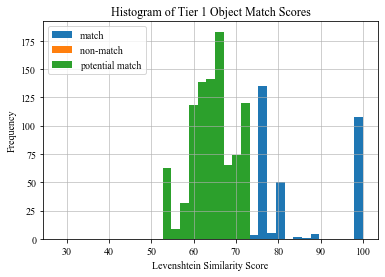

In [48]:
#cc_madw_df.iloc[obj1_best_match_ids].similarity_max1.plot.hist(grid=True, bins=20, rwidth=0.9,
#                   color='#607c8e')
#plt.title('Histogram of Tier 1 Object Match Scores')
#plt.xlabel('Levenshtein Score')
#plt.ylabel('Frequency')
#plt.grid(axis='y', alpha=0.75)

match = obj1_best_levs[obj1_best_levs>74]
non_match = obj1_best_levs[obj1_best_levs<43]
pot_match = obj1_best_levs[(obj1_best_levs>=43) & (obj1_best_levs<=74)]

bins = np.linspace(28, 100, 72/2)

plt.hist([match, non_match, pot_match], bins, label=['match', 'non-match', 'potential match'], stacked=True, rwidth=1)
plt.legend(loc='upper left')
plt.title('Histogram of Tier 1 Object Match Scores')
plt.xlabel('Levenshtein Similarity Score')
plt.ylabel('Frequency')
plt.grid(axis='both', alpha=0.75)

plt.savefig('fuzzy_sort_MADW_tree_hist_T1_new.png', dpi=600, bbox_inches='tight')

plt.show()

In [49]:
match = obj1_best_levs[obj1_best_levs>74]
non_match = obj1_best_levs[obj1_best_levs<43]
pot_match = obj1_best_levs[(obj1_best_levs>=43) & (obj1_best_levs<=74)]

T1_acc_low = (len(match) + match_prop[0] * len(pot_match)) / (len(match) + len(non_match) + len(pot_match))
T1_acc_high = (len(match) + match_prop[1] * len(pot_match)) / (len(match) + len(non_match) + len(pot_match))
print('Tier 1 Object Accuracy is Estimated at: (', T1_acc_low, ', ', T1_acc_high  ,')')

Tier 1 Object Accuracy is Estimated at: ( 0.5039952112877948 ,  0.6342978055994714 )


In [50]:
cc_madw_df.iloc[obj2_best_match_ids].similarity_max2.mean()

71.34744408945687

In [51]:
# proportion scoring below 60
obj2_best_levs = cc_madw_df.iloc[obj2_best_match_ids].similarity_max2
obj2_best_levs[obj2_best_levs<60].count()/len(obj2_best_levs)

0.3210862619808307

In [52]:
obj2_best_levs[obj2_best_levs>80].count()/len(obj2_best_levs)

0.2268370607028754

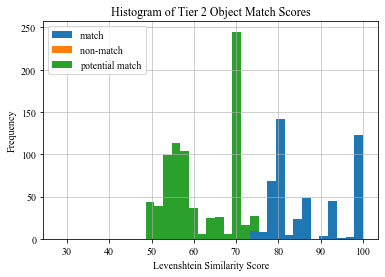

In [53]:
#cc_madw_df.iloc[obj2_best_match_ids].similarity_max2.plot.hist(grid=True, bins=20, rwidth=0.9,
#                   color='#607c8e')
#plt.title('Histogram of Tier 2 Object Match Scores')
#plt.xlabel('Levenshtein Score')
#plt.ylabel('Frequency')
#plt.grid(axis='y', alpha=0.75)

match = obj2_best_levs[obj2_best_levs>74]
non_match = obj2_best_levs[obj2_best_levs<43]
pot_match = obj2_best_levs[(obj2_best_levs>=43) & (obj2_best_levs<=74)]

bins = np.linspace(28, 100, 72/2)

plt.hist([match, non_match, pot_match], bins, label=['match', 'non-match', 'potential match'], stacked=True, rwidth=2)
plt.legend(loc='upper left')
plt.title('Histogram of Tier 2 Object Match Scores')
plt.xlabel('Levenshtein Similarity Score')
plt.ylabel('Frequency')
plt.grid(axis='both', alpha=0.75)

plt.savefig('fuzzy_sort_MADW_tree_hist_T2_new.png', dpi=600, bbox_inches='tight')

plt.show()

In [54]:
T2_acc_low = (len(match) + match_prop[0] * len(pot_match)) / (len(match) + len(non_match) + len(pot_match))
T2_acc_high = (len(match) + match_prop[1] * len(pot_match)) / (len(match) + len(non_match) + len(pot_match))
print('Tier 2 Object Accuracy is Estimated at: (', T2_acc_low, ', ', T2_acc_high  ,')')

Tier 2 Object Accuracy is Estimated at: ( 0.5922672499569159 ,  0.6993803995182095 )


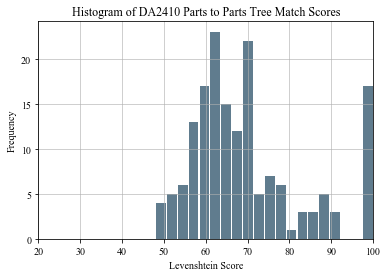

In [55]:
# histogram of the 2410 parts list to the uh60 parts tree for reference
sort_leven_cc = []
for list in max_sim_scores_fz:
    sort_leven_cc.append(list[1])

plt.hist(sort_leven_cc, bins=20, rwidth=0.9, color='#607c8e')
plt.title('Histogram of DA2410 Parts to Parts Tree Match Scores')
plt.xlabel('Levenshtein Score')
plt.ylabel('Frequency')
plt.xlim(left=20, right=100)
plt.grid(axis='both', alpha=0.75)

In [56]:
sum(sort_leven_cc) / len(sort_leven_cc)

69.73053892215569

In [57]:
# proportion of cc_parts less than 60
len([num for num in sort_leven_cc if num < 60]) / len(sort_leven_cc)

0.2215568862275449

In [58]:
# proportion of cc_parts above 80
len([num for num in sort_leven_cc if num > 80]) / len(sort_leven_cc)

0.18562874251497005

In [59]:
cc_madw_df.to_csv(r'/Users/mh302/Desktop/2017_cc_madw_df_worked_new.csv', encoding='utf-8', index=False)

## New session, start below...

In [3]:
import pandas as pd
#cc_madw_df = pd.read_csv(r'/Users/mh302/Desktop/2017_cc_madw_df_worked.csv', encoding='utf-8', low_memory=False)
cc_madw_df = pd.read_csv(r'/Users/mh302/Desktop/2017_cc_madw_df_worked_new.csv', encoding='utf-8', low_memory=False)

/Users/mh302/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (28,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# for each unique corpus christi record, find the best match of objects 
obj1_best_match_ids = []
obj2_best_match_ids = []
for id in set(cc_madw_df['index'].values):
    # set up emtpy df
    temp = pd.DataFrame()

    # subset to the joined records for each unique cc record
    temp = cc_madw_df[cc_madw_df['index'] == id]
    
    #keep record id for the best matching record for both tier 1 and 2
    # df.loc[df['Value'].idxmax()]
    obj1_best_match_ids.append(temp['similarity_max1'].idxmax(axis=0))
    obj2_best_match_ids.append(temp['similarity_max2'].idxmax(axis=0))

In [8]:
cc_madw_df.head()

,index,COPY,DATE_2410,PN_NOUN,NSN,PN,SN,DESCRIPTION_x,REMARKS,SYS_CAT,...,RFG,DESCRIPTION_y,sim_score,t1_prt_tree_lev,t2_prt_tree_lev,tree_match1,similarity_max1,tree_match2,similarity_max2,corr_match
0,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,15C05,apu start fuel nozzle,60.0,30,32,apu reduction drive,41,apu rotor,46,0
1,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,15C05,apu start fuel nozzle,60.0,30,32,apu reduction drive,41,apu generator,45,0
2,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,15C05,apu start fuel nozzle,60.0,30,32,apu fuel control,42,apu combustor drain valve,43,0
3,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,15C05,apu start fuel nozzle,60.0,30,32,apu oil filter,33,apu control unit,38,0
4,40366,1,26-Oct-17,6071T04G02/STAGE 1 NOZZLE ASSY,2.840000e+12,6071T04G02,MDK0V6VV,070-Broken,NaN,T700,...,15C05,apu start fuel nozzle,60.0,30,32,apu oil filter,33,apu engine,35,0


In [60]:
cc_fuzzy_match_true_labs =  pd.read_csv('cc_treez_match_df_human_ann.csv')

In [61]:
tot = len(cc_fuzzy_match_true_labs['match'])
len(cc_fuzzy_match_true_labs[cc_fuzzy_match_true_labs['match'] == 0].match) / (tot - cc_fuzzy_match_true_labs['match'].isnull().sum())

0.4311377245508982

In [62]:
max(cc_fuzzy_match_true_labs[cc_fuzzy_match_true_labs['match'] == 0].sim_score)

74.0

In [63]:
num_matches43to74 = len(cc_fuzzy_match_true_labs[(cc_fuzzy_match_true_labs['match'] == 1) & (cc_fuzzy_match_true_labs['sim_score'] <= 74) & (cc_fuzzy_match_true_labs['sim_score'] >= 43)].sim_score)
total_43to74 = len(cc_fuzzy_match_true_labs[(cc_fuzzy_match_true_labs['sim_score'] <= 74) & (cc_fuzzy_match_true_labs['sim_score'] >= 43)].sim_score)
num_matches43to74 / total_43to74


0.42857142857142855

In [64]:
from statsmodels.stats import proportion as prop
# compute 95% CI on proportion of matches present between sim scores of 43 anad 74
match_prop = prop.proportion_confint(count=num_matches43to74, nobs=total_43to74, alpha=0.05, method='normal')
match_prop

(0.34216314039440565, 0.5149797167484514)

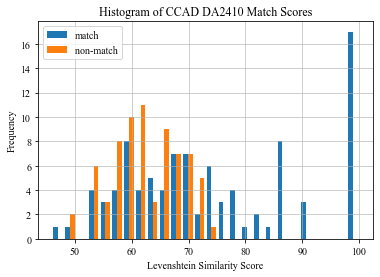

In [65]:
match = cc_fuzzy_match_true_labs[cc_fuzzy_match_true_labs['match'] == 1].sim_score
non_match = cc_fuzzy_match_true_labs[cc_fuzzy_match_true_labs['match'] == 0].sim_score

bins = np.linspace(46, 100, 27)

plt.hist([match, non_match], bins, label=['match', 'non-match'])
plt.legend(loc='upper left')
plt.title('Histogram of CCAD DA2410 Match Scores')
plt.xlabel('Levenshtein Similarity Score')
plt.ylabel('Frequency')
plt.grid(axis='both', alpha=0.75)

plt.savefig('fuzzy_sort_cc_tree_hist2_new.png', dpi=600, bbox_inches='tight')

plt.show()

In [66]:
# If we select the best matching Tier1 object for each 2410 record....
best_obj1_match_df = cc_madw_df.iloc[ obj1_best_match_ids, :]
print('Proportion of records with a corr match:', len(best_obj1_match_df[best_obj1_match_df['corr_match']==1].corr_match)/ len(best_obj1_match_df.corr_match))

Proportion of records with a corr match: 0.46246006389776356


### For the best matching record according to Tier 1 Object similarity score, accuracy estimates on both T1 and T2 to the UH-60 Parts Tree

In [67]:
# ID best matches according to Tier 1 Obj sim score
obj1_1_best_levs = cc_madw_df.iloc[obj1_best_match_ids].similarity_max1
obj1_2_best_levs = cc_madw_df.iloc[obj1_best_match_ids].similarity_max2

# subset the matches, non-matches, and potential matches according to sim score criteria
match1_1 = obj1_1_best_levs[obj1_1_best_levs>74]
non_match1_1 = obj1_1_best_levs[obj1_1_best_levs<43]
pot_match1_1 = obj1_1_best_levs[(obj1_1_best_levs>=43) & (obj1_1_best_levs<=74)]

T1_acc_low = (len(match1_1) + match_prop[0] * len(pot_match1_1)) / (len(match1_1) + len(non_match1_1) + len(pot_match1_1))
T1_acc_high = (len(match1_1) + match_prop[1] * len(pot_match1_1)) / (len(match1_1) + len(non_match1_1) + len(pot_match1_1))
print('Tier 1 Object Accuracy is Estimated at: (', T1_acc_low, ', ', T1_acc_high  ,')')

match1_2 = obj1_2_best_levs[obj1_2_best_levs>74]
non_match1_2 = obj1_2_best_levs[obj1_2_best_levs<43]
pot_match1_2 = obj1_2_best_levs[(obj1_2_best_levs>=43) & (obj1_2_best_levs<=74)]

T2_acc_low = (len(match1_2) + match_prop[0] * len(pot_match1_2)) / (len(match1_2) + len(non_match1_2) + len(pot_match1_2))
T2_acc_high = (len(match1_2) + match_prop[1] * len(pot_match1_2)) / (len(match1_2) + len(non_match1_2) + len(pot_match1_2))
print('Tier 2 Object Accuracy is Estimated at: (', T2_acc_low, ', ', T2_acc_high  ,')')

Tier 1 Object Accuracy is Estimated at: ( 0.5039952112877948 ,  0.6342978055994714 )
Tier 2 Object Accuracy is Estimated at: ( 0.3936551629513931 ,  0.5529445632010487 )


Plots show the levenshtein distance scores for tier 1 and tier 2 objects if the best matching tier 1 object determines which record is selected for each 2410 part.

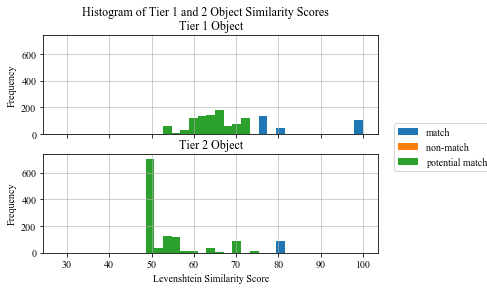

In [68]:
import matplotlib.pyplot as plt

bins = np.linspace(28, 100, 72/2)

fig, (axs1, axs2) = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Histogram of Tier 1 and 2 Object Similarity Scores')

axs1.hist([match1_1, non_match1_1, pot_match1_1], bins, label=['match', 'non-match', 'potential match'], stacked=True, rwidth=2)
axs1.grid(axis='both', alpha=0.75)
axs1.set_title('Tier 1 Object')

axs2.hist([match1_2, non_match1_2, pot_match1_2], bins, stacked=True, rwidth=2)
axs2.grid(axis='both', alpha=0.75)
axs2.set_title('Tier 2 Object')

fig.legend(bbox_to_anchor=(.90, 0.5), loc="center left")

# set labels
plt.setp(axs1, ylabel='Frequency')
plt.setp(axs2, xlabel='Levenshtein Similarity Score', ylabel='Frequency')

plt.savefig('fuzzy_sort_MADW_tree_hist_T1_match_new.png', dpi=600, bbox_inches='tight')

plt.show()

In [69]:
# If we select the best matching Tier2 object for each 2410 record....
best_obj2_match_df = cc_madw_df.iloc[ obj2_best_match_ids, :]
print('Proportion of records with a corr match:', len(best_obj2_match_df[best_obj2_match_df['corr_match']==1].corr_match)/ len(best_obj2_match_df.corr_match))

Proportion of records with a corr match: 0.505591054313099


Plots show the levenshtein distance scores for tier 1 and tier 2 objects if the best matching tier 2 object determines which record is selected for each 2410 part.

### For the best matching record according to Tier 2 Object similarity score, accuracy estimates on both T1 and T2 to the UH-60 Parts Tree

In [70]:
# ID best matches according to Tier 2 Obj sim score
obj2_1_best_levs = cc_madw_df.iloc[obj2_best_match_ids].similarity_max1
obj2_2_best_levs = cc_madw_df.iloc[obj2_best_match_ids].similarity_max2

# subset the matches, non-matches, and potential matches according to sim score criteria
match2_1 = obj2_1_best_levs[obj2_1_best_levs>74]
non_match2_1 = obj2_1_best_levs[obj2_1_best_levs<43]
pot_match2_1 = obj2_1_best_levs[(obj2_1_best_levs>=43) & (obj2_1_best_levs<=74)]

T1_acc_low = (len(match2_1) + match_prop[0] * len(pot_match2_1)) / (len(match2_1) + len(non_match2_1) + len(pot_match2_1))
T1_acc_high = (len(match2_1) + match_prop[1] * len(pot_match2_1)) / (len(match2_1) + len(non_match2_1) + len(pot_match2_1))
print('Tier 1 Object Accuracy is Estimated at: (', T1_acc_low, ', ', T1_acc_high  ,')')

match2_2 = obj2_2_best_levs[obj2_2_best_levs>74]
non_match2_2 = obj2_2_best_levs[obj2_2_best_levs<43]
pot_match2_2 = obj2_2_best_levs[(obj2_2_best_levs>=43) & (obj2_2_best_levs<=74)]

T2_acc_low = (len(match2_2) + match_prop[0] * len(pot_match2_2)) / (len(match2_2) + len(non_match2_2) + len(pot_match2_2))
T2_acc_high = (len(match2_2) + match_prop[1] * len(pot_match2_2)) / (len(match2_2) + len(non_match2_2) + len(pot_match2_2))
print('Tier 2 Object Accuracy is Estimated at: (', T2_acc_low, ', ', T2_acc_high  ,')')

Tier 1 Object Accuracy is Estimated at: ( 0.39996030857061604 ,  0.55759331990953 )
Tier 2 Object Accuracy is Estimated at: ( 0.5922672499569159 ,  0.6993803995182095 )


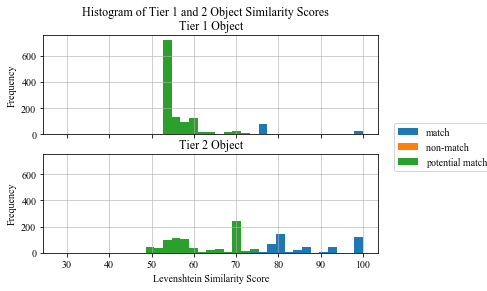

In [71]:
import matplotlib.pyplot as plt

bins = np.linspace(28, 100, 72/2)

fig, (axs1, axs2) = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Histogram of Tier 1 and 2 Object Similarity Scores')

axs1.hist([match2_1, non_match2_1, pot_match2_1], bins, label=['match', 'non-match', 'potential match'], stacked=True, rwidth=2)
axs1.grid(axis='both', alpha=0.75)
axs1.set_title('Tier 1 Object')

axs2.hist([match2_2, non_match2_2, pot_match2_2], bins, stacked=True, rwidth=2)
axs2.grid(axis='both', alpha=0.75)
axs2.set_title('Tier 2 Object')

fig.legend(bbox_to_anchor=(.90, 0.5), loc="center left")

# set labels
plt.setp(axs1, ylabel='Frequency')
plt.setp(axs2, xlabel='Levenshtein Similarity Score', ylabel='Frequency')

plt.savefig('fuzzy_sort_MADW_tree_hist_T2_match_new.png', dpi=600, bbox_inches='tight')

plt.show()

## Identify MADW Expert System Corrosion-Tagging Performance Metrics

In [72]:
# subset to best tier 2 matches
obj2_recs = cc_madw_df.iloc[obj2_best_match_ids]
# subset to record linkage matches by similarity score
obj2_recs = obj2_recs[obj2_recs['similarity_max2'] > 74]
print(obj2_recs[['similarity_max2', 'corr_match']])
print('Of ', len(obj2_recs.corr_match), ' matching records...')
# check accuracy of corrosion tag for "matching" ASAP-RAM to MADW records
print('Proportion of "matching" records with a corr match:', len(obj2_recs[obj2_recs['corr_match']==1].corr_match)/ len(obj2_recs.corr_match))

        similarity_max2  corr_match
216194               93           0
216195               93           0
129759              100           0
252741               80           1
240390              100           0
...                 ...         ...
677857               79           0
612958               86           0
94280               100           0
95050               100           1
157986               82           0

[476 rows x 2 columns]
Of  476  matching records...
Proportion of "matching" records with a corr match: 0.4327731092436975


In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [75]:
# https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/ 
# make the y_MADW column an indicator for 1 = corrosion-tag, 0 = no corrosion
y_ASAPRAM = []
for row in obj2_recs.DESCRIPTION_x:
    if row in ['170-Corroded', '520-Pitted', '050-Blistered', '240-Flaking']:
        y_ASAPRAM.append(1)
    else:
        y_ASAPRAM.append(0)
        
# make the y_MADW column an indicator for 1 = corrosion-tag, 0 = no corrosion
y_MADW = []
for row in obj2_recs.CorroPerc:
    if row !=0:
        y_MADW.append(1)
    else:
        y_MADW.append(0)

yhat_classes = y_MADW
y_test = y_ASAPRAM 

#tp
# accuracy: (tp + tn) / (p + n), the ratio of correctly predicted observation to the total observations.
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp), the ratio of correctly predicted positive observations to the total predicted positive observations
# If precision is high, we are making correct corrosion tags, but possibly missing corrosion items
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn), ratio of correctly predicted positive observations to the all observations in actual class
# So if recall is low, we are missing actual corrosion actions
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn), the weighted average of Precision and Recall
# If this is high, we are making correct corrosion tags and not missing actions that should be corrosion.
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.432773
Precision: 0.587571
Recall: 0.345515
F1 score: 0.435146


In [76]:
# accuracy: (tp + tn) / (p + n), the ratio of correctly predicted observation to the total observations.
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp), the ratio of correctly predicted positive observations to the total predicted positive observations
# If precision is high, we are making correct corrosion tags, but possibly missing corrosion items
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn), ratio of correctly predicted positive observations to the all observations in actual class
# So if recall is low, we are missing actual corrosion actions
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn), the weighted average of Precision and Recall
# If this is high, we are making correct corrosion tags and not missing actions that should be corrosion.
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

Accuracy: 0.432773
Precision: 0.587571
Recall: 0.345515
F1 score: 0.435146


In [77]:
obj2_recs.columns

Index(['index', 'COPY', 'DATE_2410', 'PN_NOUN', 'NSN', 'PN', 'SN',
       'DESCRIPTION_x', 'REMARKS', 'SYS_CAT', 'NHA_SN', 'UIC', 'CITY',
       'ORG_NAME', 'QTY', 'YEAR', 'NOUN', 'PRICE', 'date1_2410', 'AvailCD',
       'CalcLaborCorroCost', 'CalcLaborCost', 'CalcMatlCorroCost',
       'CalcMatlCost', 'CorrectiveCorroCost', 'CorrectiveMaintCost',
       'CorroPerc', 'DataSource', 'EndItemUniqueID', 'EngineTMS',
       'InstallationMasterName', 'ESIZone', 'LMIWBS', 'LMIWBSNIIN',
       'MaintActionCD', 'MaintActionFY', 'MaintCompletionDate', 'MaintDLH',
       'MaintOperationDetailDesc', 'MaintStartDate', 'Maint_TAT',
       'OPNComplDate', 'OPNStartDate', 'OrigLaborCost', 'orig_maint_tat',
       'OrigMatlCost', 'PartCorroCost', 'PartMaintCost',
       'PreventiveCorrective', 'PreventiveCorroCost', 'PreventiveMaintCost',
       'SorCD', 'StructureCorroCost', 'StructureMaintCost', 'TMS',
       'TotalCalcCorroCost', 'TotalCalcCost', 'UnitCD', 'Tier1Object',
       'Tier2Object', 'maint

In [78]:
# write out matching records for evaluation of the Keras_1D classifier 
obj2_recs.to_csv('obj2_recs_new.csv', encoding='utf-8', index=True)

### Comparison to the DA2410 Similarity Scores...

In [23]:
print('Proportion of levenshtein scores below 60 for 2410 parts: ' , 
     len([num for num in best_obj2_match_df.sim_score if num < 60]) / len(best_obj2_match_df.sim_score))
print('Proportion of levenshtein scores above 80 for for 2410 parts: ' , 
     len([num for num in best_obj2_match_df.sim_score if num > 80]) / len(best_obj2_match_df.sim_score))

Proportion of levenshtein scores below 60 for 2410 parts:  0.1853035143769968
Proportion of levenshtein scores above 80 for for 2410 parts:  0.13498402555910544


The Tier 2 object similarity max took the max score for any part up the tree in the UH60 parts tree.  Tier 2 object should not necessarily be expected to be a match to the 2410 part.  This is becuase a maintenance record might be describing a larger maintenance action than the 2410 part removal..A 2410 is completed for any part removed from a UH60, so the job may have removed multiple parts rather than just the one in the 2410 record.

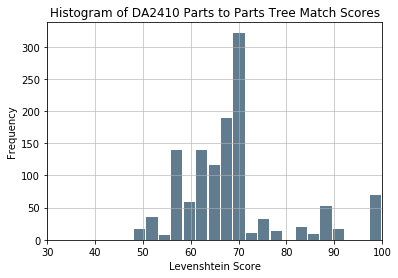

In [27]:
best_obj2_match_df.sim_score.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Histogram of DA2410 Parts to Parts Tree Match Scores')
plt.xlabel('Levenshtein Score')
plt.ylabel('Frequency')
plt.xlim(left=30, right=100)
plt.grid(axis='both', alpha=0.75)
plt.show()

In [79]:
p1 = len(match1_1) / len(obj1_1_best_levs) 
p2 = len(non_match1_1) / len(obj1_1_best_levs)
p3 = len(pot_match1_1) / len(obj1_1_best_levs)
p4 = len(match1_2) / len(obj1_2_best_levs) 
p5 = len(non_match1_2) / len(obj1_2_best_levs)
p6 = len(pot_match1_2) / len(obj1_2_best_levs)
p21 = len(match2_1) / len(obj2_1_best_levs) 
p22 = len(non_match2_1) / len(obj2_1_best_levs)
p23 = len(pot_match2_1) / len(obj2_1_best_levs)
p24 = len(match2_2) / len(obj2_2_best_levs) 
p25 = len(non_match2_2) / len(obj2_2_best_levs)
p26 = len(pot_match2_2) / len(obj2_2_best_levs)

res = {
    'Prioritized Object' : ['Tier 1', 'Tier 1', 'Tier 2', 'Tier 2'],
    'Object': ['Tier 1', 'Tier 2', 'Tier 1', 'Tier 2'],
    'Match': [p1, p4, p21, p24],
    'Non-match': [p2, p5, p22, p25],
    'Potential Match': [p3, p6, p23, p26]
    }

df = pd.DataFrame(res)

print (df)

  Prioritized Object  Object     Match  Non-match  Potential Match
0             Tier 1  Tier 1  0.246006        0.0         0.753994
1             Tier 1  Tier 2  0.078275        0.0         0.921725
2             Tier 2  Tier 1  0.087859        0.0         0.912141
3             Tier 2  Tier 2  0.380192        0.0         0.619808


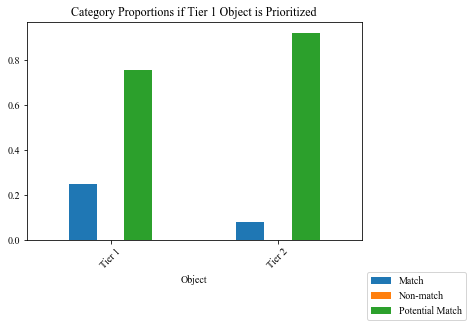

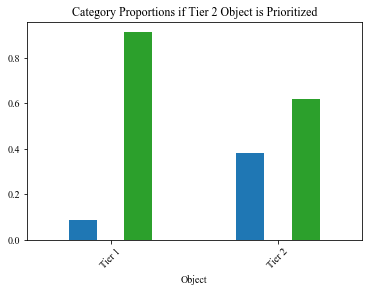

In [80]:
#df.plot.bar( y='Proportion', rot=0)
#df[df['Prioritized Object']=='Tier 1'][['Object' ,  'Match Category' , 'Proportion']].groupby(['Object' ,  'Match Category']).plot.bar(rot=45, subplots=False)
#axes[1].legend(loc=1)

(axs1, axs2) = df.set_index('Object').groupby(['Prioritized Object']).plot(kind='bar',  stacked=False, rot=45)
axs1.set_title('Category Proportions if Tier 1 Object is Prioritized')
axs2.set_title('Category Proportions if Tier 2 Object is Prioritized')
axs1.legend(bbox_to_anchor=(1, -0.125), loc="upper left")
#axs1.set_title('Proportion of Tier Objects in each Category')
axs2.get_legend().remove()

fig.savefig('category_props_new.png', dpi=600, bbox_inches='tight')
plt.show()



In [261]:
#with open("/Users/mh302/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/proposed_new_sws_dict.csv") as f:
    
import csv

with open('/Users/mh302/OneDrive - West Point/Backup/ORCEN/CPO/deep_learning/proposed_new_sws_dict.csv', mode='r') as infile:
    reader = csv.reader(infile)
#     with open('coors_new.csv', mode='w') as outfile:
#         writer = csv.writer(outfile)
    mydict = {rows[0]:rows[1].replace('"', '') for rows in reader}

    
for key in mydict.keys():
    mydict[key] = mydict[key].replace('"', '')
print(mydict)

{'hardener': "['stabilizatn', 'ibet', 'mrke', 'fabricatedshorted', 'completepaint']", 'hardness': "['parked', 'blanet', 'noticeably', 'damagesoundproofe', 'lbds']", 'preheat': "['hvms', 'fuelfrombnut', 'meaurement', 'illistration', 'satcon']", 'debounding': "['intalled', 'repairment', 'visualy', 'jung', 'turntable']", 'disbonding': "['cloth', 'layer', '3na', 'errosion']", 'disponding': "['defeere', 'hdfs', 'tb2a', 'fcrmma', 'update2']", 'debonding': "['layer', 'lip', 'kevlar', 'leading']", 'disbonded': "['disponde', 'cloth', '3na']", 'debonded': "['4t', 'inspectionblue', 'mtpp', 'securinig', 'weatherproof']", 'debound': "['olsen', 'darla', 'ripps', 'dshrd', 'preforme']", 'disbond': "['penetrate', 'delaminating', 'anhedral', 'delaminated']", 'debond': "['region', 'erode', 'blending', 'meob']", 'debonde': "['rebonde', 'deteriorate', 'nutplate', 'chafe', 'marked']", 'baterie': "['replac', 'sfa', 'u2', 'seviceability', 'usual']", 'ndi': "['qty', '1ea', 'rl', 'pit', 'mike']", 'ndt': "['pene

In [264]:
num_proposed_keywords = 0
for value in mydict.values():
    num_proposed_keywords += len(value.split())
num_proposed_keywords

2422